# Kernelized Linear Classification

Import standard libraries and custom classes:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pipeline import *

## Exploratory data analysis and preprocessing

In [2]:
dp = DataPreprocessor()

Load the dataset:

In [3]:
dp.load_data("dataset.csv")
dp.df.head()

x1        x2          x3        x4        x5        x6        x7  \
0  1.205492  5.823226   98.837539 -1.075852  0.999205  0.911543  3.623558   
1  1.391530  3.611581   98.857197 -5.020318  0.677165  0.999492  3.413112   
2  1.692571 -0.887019  100.901276 -0.595548  0.177550 -0.915495  4.320264   
3  4.289320  1.416843  100.784735 -2.897154 -0.066972 -0.786173  2.093003   
4  0.542420 -1.010095  100.015580 -3.070705  0.088324 -0.242669  0.767942   

         x8        x9        x10  y  
0 -1.720267 -0.346191 -54.708330 -1  
1  4.253865  2.041603 -54.317291  1  
2  0.907834  3.126815 -56.397484 -1  
3  1.336237  2.183829 -56.197728  1  
4 -0.284683 -2.104145 -55.794045  1

Summary statistics:

In [4]:
dp.df.describe()

x1            x2            x3            x4            x5  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       1.591298      0.515879     99.848936     -1.504139      0.077645   
std        1.321185      2.054488      0.710948      1.133605      0.707270   
min        0.002443     -7.524934     98.572455     -7.078939     -1.000000   
25%        0.524758     -0.883862     99.159314     -2.179713     -0.624710   
50%        1.276243      0.492813     99.802830     -1.262985      0.157145   
75%        2.352106      1.902003    100.549141     -0.605316      0.777856   
max        9.384223      8.302375    101.260768     -0.000003      1.000000   

                 x6            x7            x8            x9           x10  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       0.051823      0.975207      0.635194      0.051926    -55.447678   
std        0.704755      2.162237      2.212708      1.769646      0.710082   
min       -1.000000     -6.906971     -7.140755     -7.151890    -56.773931   
25%       -0.644261     -0.500506     -0.879985     -1.129665    -56.137679   
50%        0.101648      1.006918      0.624762      0.024726    -55.397208   
75%        0.754770      2.434886      2.098389      1.248961    -54.758351   
max        1.000000      8.760306      9.287266      6.211452    -54.208890   

                  y  
count  10000.000000  
mean      -0.001600  
std        1.000049  
min       -1.000000  
25%       -1.000000  
50%       -1.000000  
75%        1.000000  
max        1.000000

Checking for missing values:

In [5]:
dp.check_missing()

x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
y      0
dtype: int64

Variable distributions:

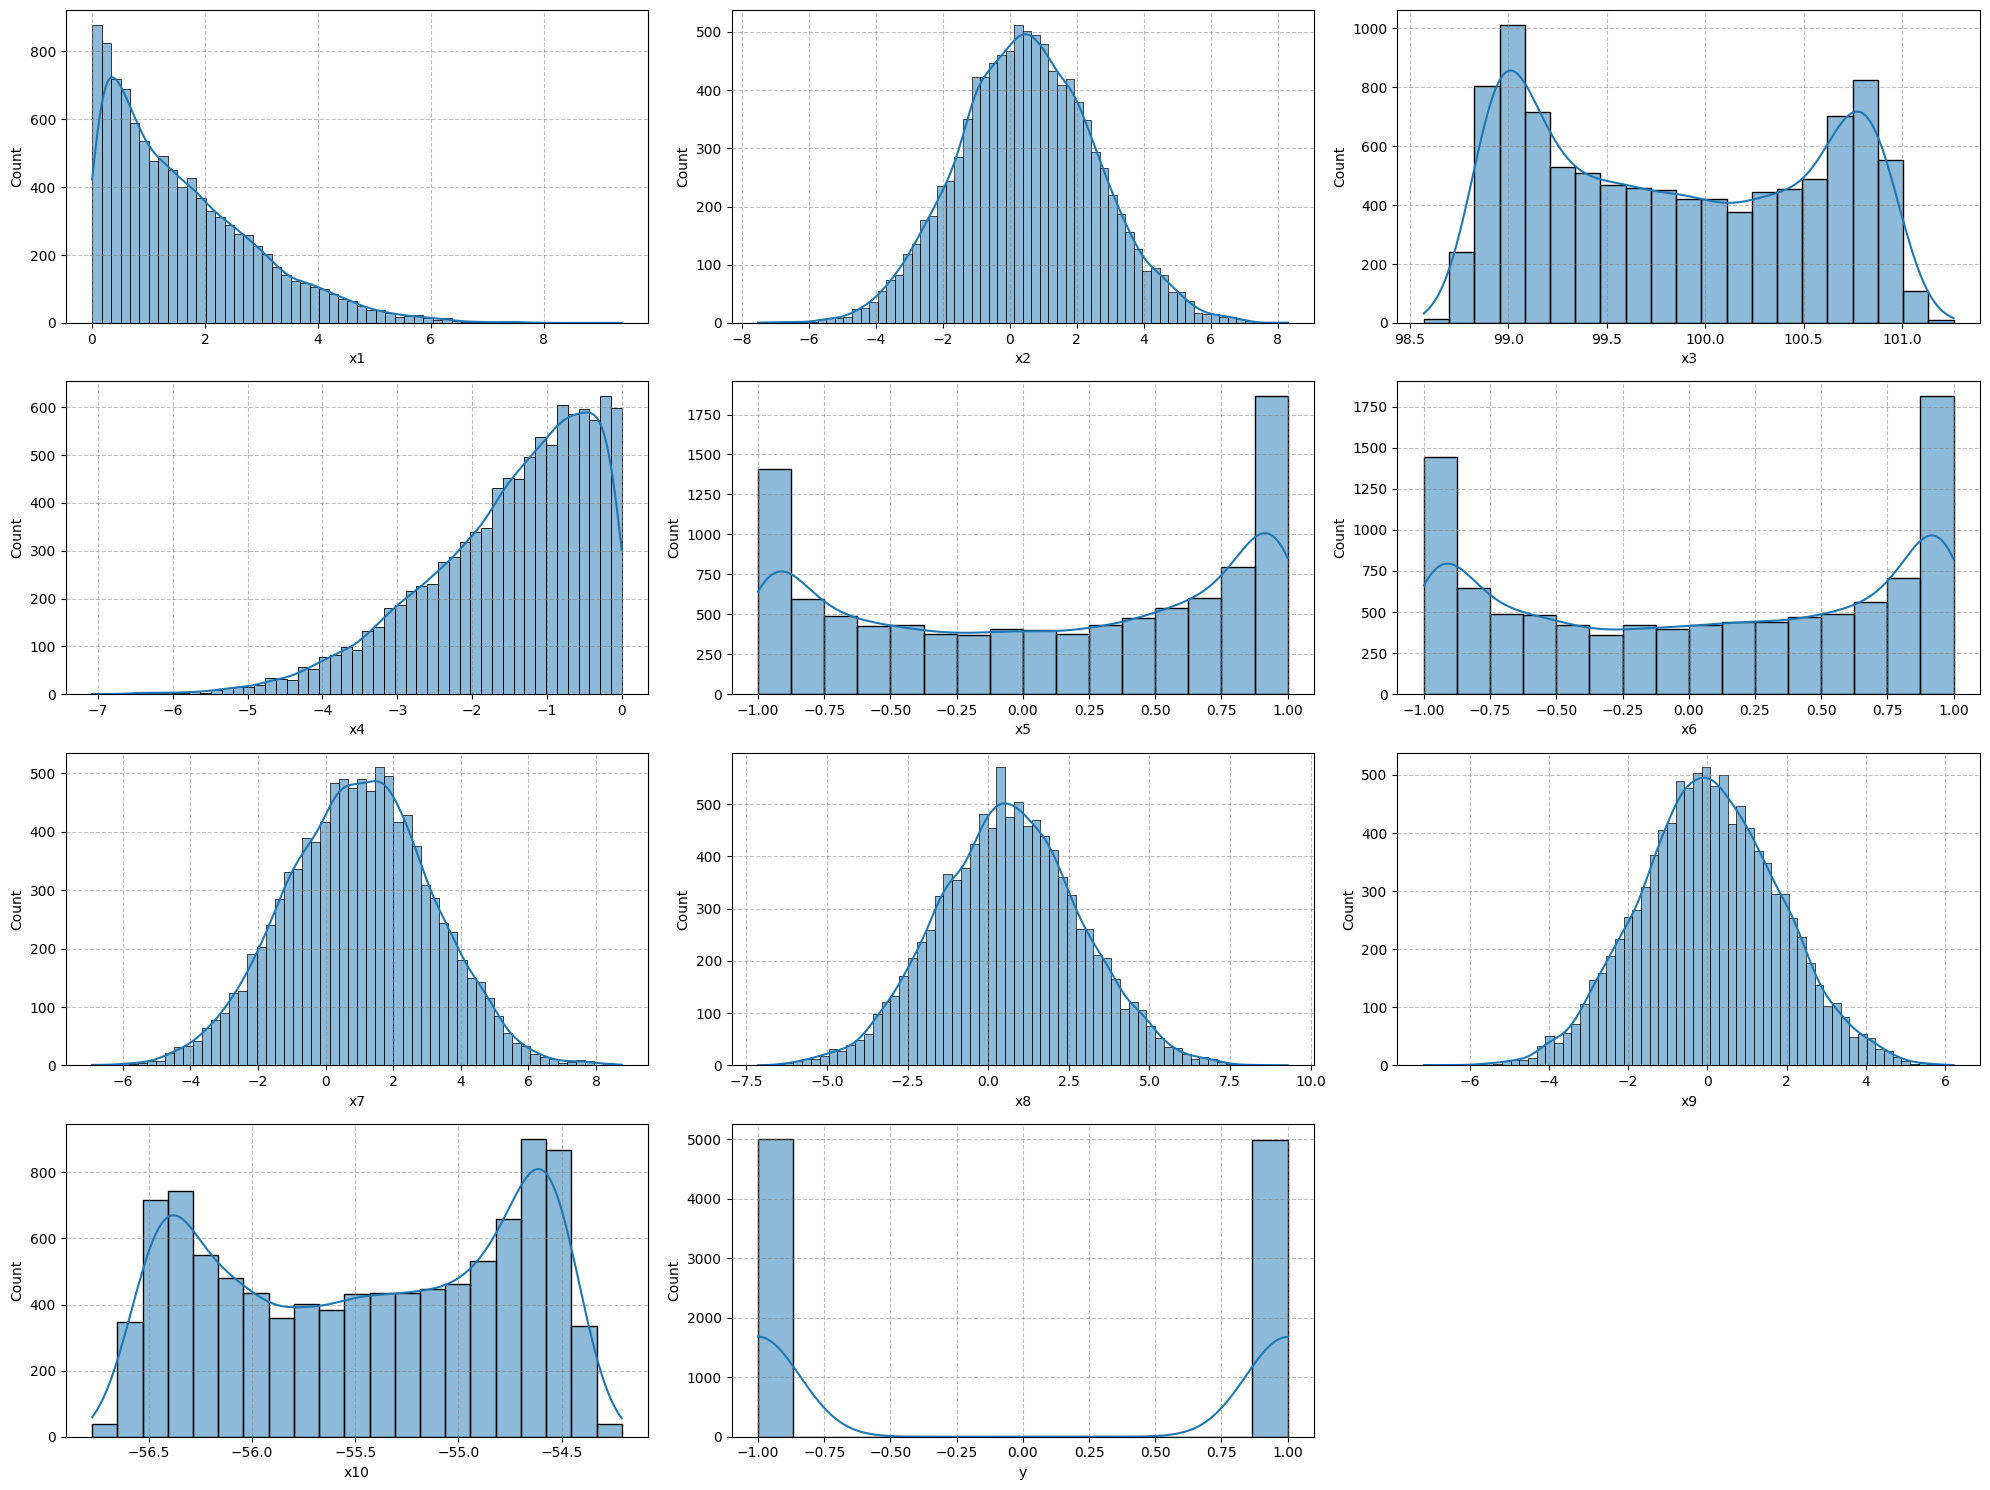

In [6]:
dp.plot_distributions()

Pairwise relationships between numerical features:

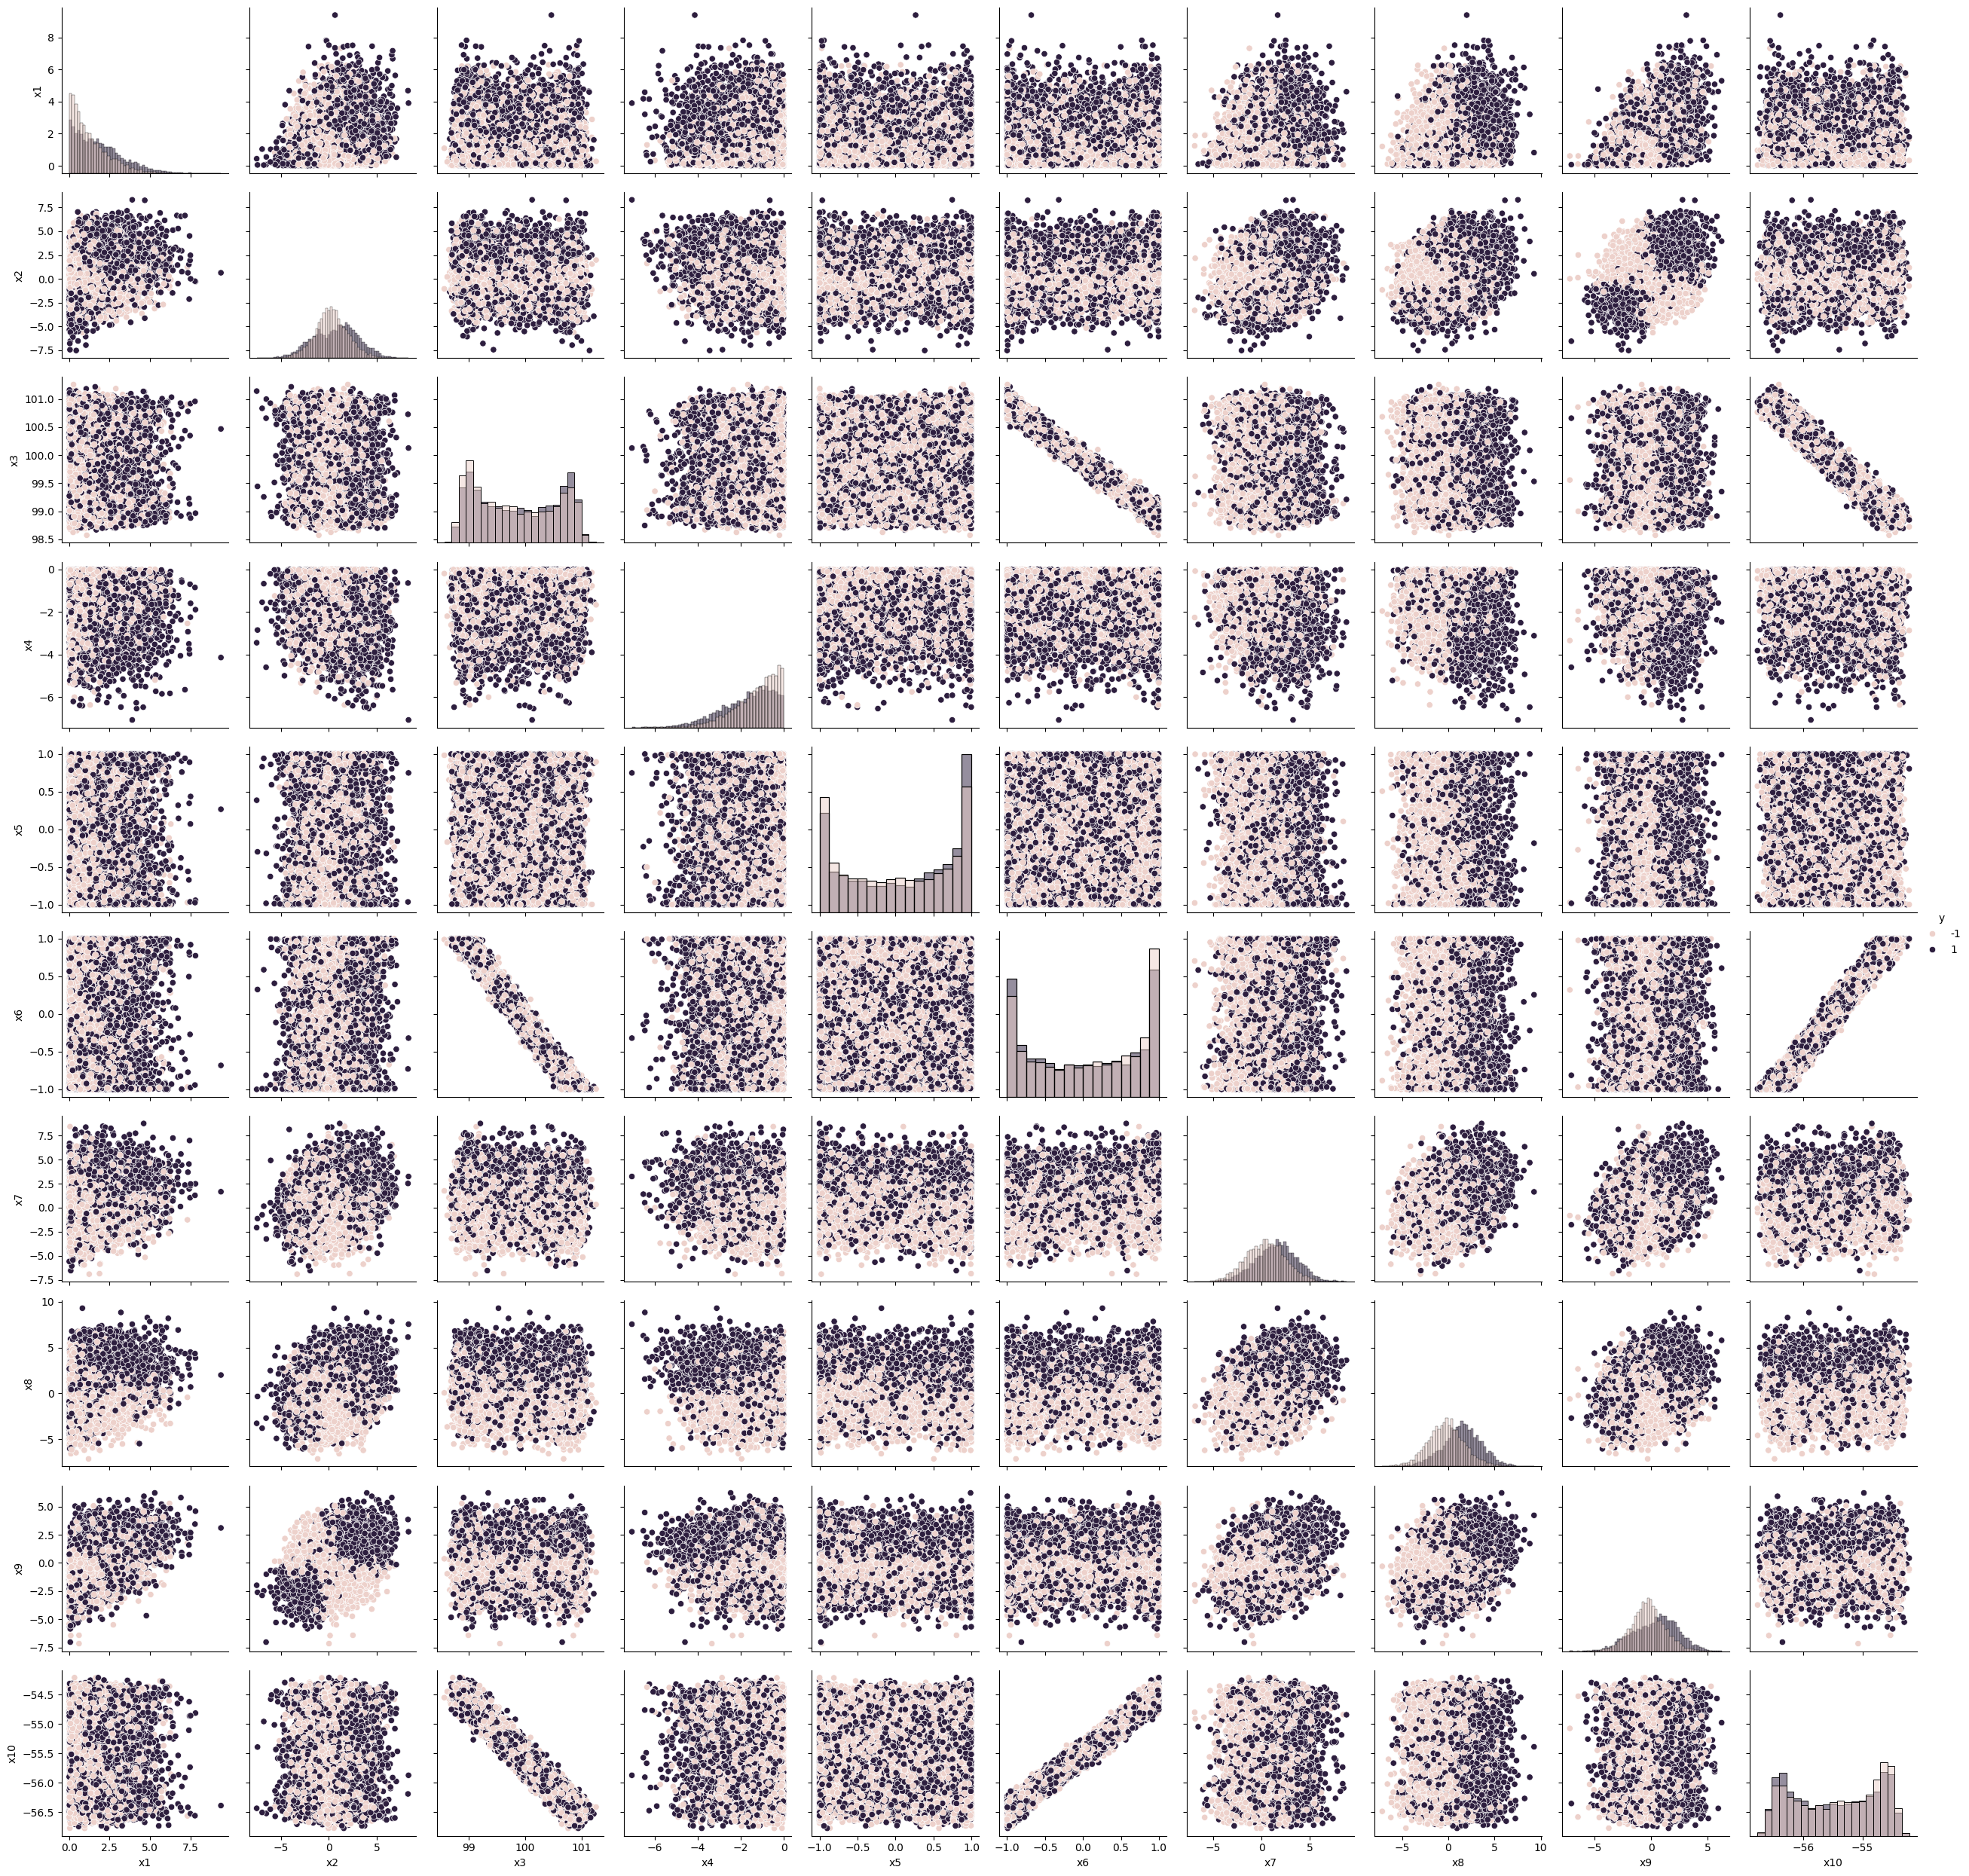

In [7]:
dp.plot_pairplot()

Split dataset into training and test sets:

In [8]:
dp.split()

Training set shape: (8000, 10)
Test set shape: (2000, 10)


Boxplots of features in the training set:

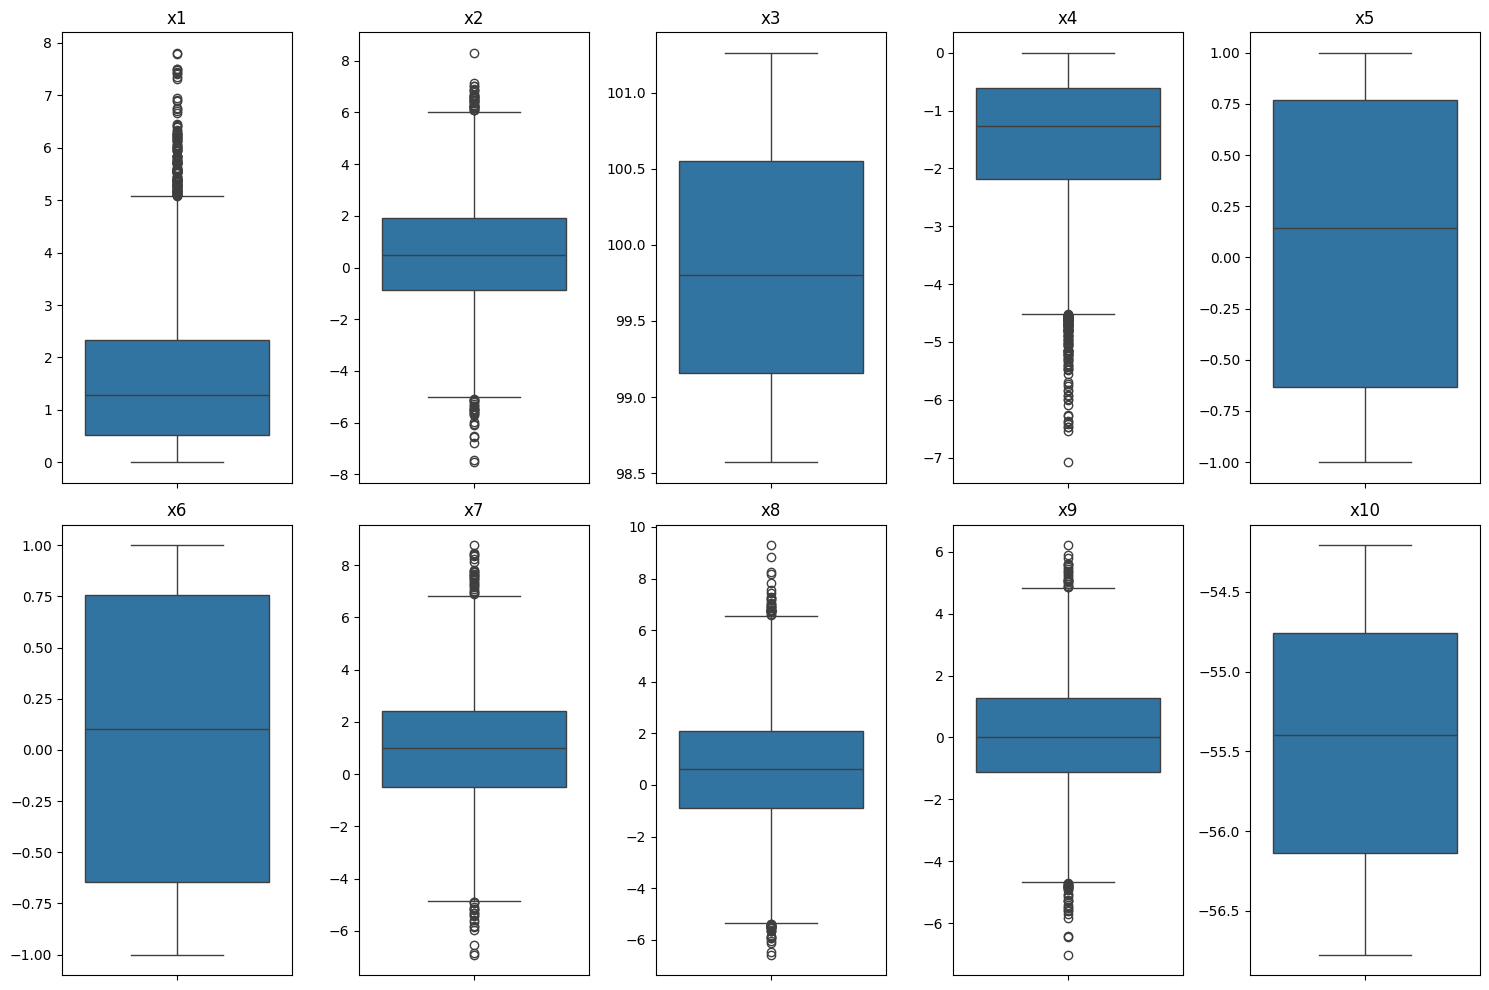

In [9]:
dp.plot_boxplots()

Remove outliers:

In [10]:
dp.remove_outliers()

435 outliers removed from the training set.


Check correlations among features in the training set:

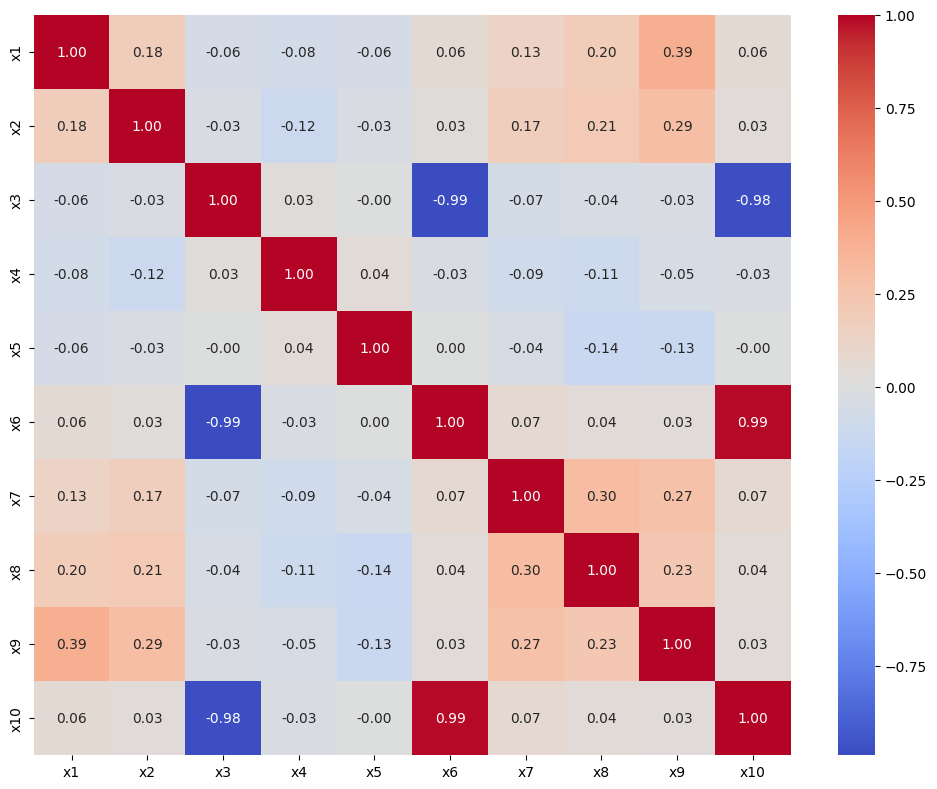

In [11]:
dp.plot_correlations()

In [12]:
dp.remove_highly_correlated()

Removed 2 highly correlated features: x6, x10


Scaling the features based on training set statistics:

In [13]:
dp.standardize()
dp.X_train.describe()

x1            x2            x3            x4            x5  \
count  7.565000e+03  7.565000e+03  7.565000e+03  7.565000e+03  7.565000e+03   
mean   2.442050e-16 -1.502800e-17  1.243098e-14  8.641101e-17 -3.287376e-18   
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
min   -1.260785e+00 -2.783162e+00 -1.795677e+00 -2.984120e+00 -1.530183e+00   
25%   -8.370948e-01 -6.917997e-01 -9.694602e-01 -6.470638e-01 -9.900930e-01   
50%   -2.132248e-01 -8.918295e-03 -6.259484e-02  1.978057e-01  1.237996e-01   
75%    6.331645e-01  6.904195e-01  9.873581e-01  8.125602e-01  9.865632e-01   
max    2.981570e+00  2.826116e+00  1.982281e+00  1.386340e+00  1.303165e+00   

                 x7            x8            x9  
count  7.565000e+03  7.565000e+03  7.565000e+03  
mean   6.574751e-18 -8.453251e-18 -2.348125e-19  
std    1.000000e+00  1.000000e+00  1.000000e+00  
min   -2.776620e+00 -2.804169e+00 -2.776119e+00  
25%   -6.886041e-01 -6.975958e-01 -6.777191e-01  
50%    1.853631e-02 -6.367543e-04 -1.901702e-02  
75%    6.870046e-01  6.775951e-01  6.901343e-01  
max    2.797540e+00  2.828902e+00  2.834454e+00

Check class balance:

In [14]:
dp.check_label_distribution()

Label distribution in training set:
  Label -1: 51.80%
  Label 1: 48.20%

Label distribution in test set:
  Label -1: 49.60%
  Label 1: 50.40%
